# Software Evolution - Practical Session
## Laws of software evolution, code counting, code duplication and dependency analysis
## Academic year 2022-2023

### Write your answers under the questions that are present in this notebook  

### Read Section 1 and Section 2 in the provided description document before proceeding with the following section 

In [43]:
import os
import json
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import math
from pandas import option_context
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# I Am sorry, I had some issues with CLOC because I am using Windows so, I can't answer some questions about CLOC

## 2. Verifying laws of software evolution

In [220]:
#Enter the path where the Eucalyptus project is present
eucalyptus_project_path = 'C:/Users/jkmhx/Desktop/UMons/M2/SE/TPs/TP2/eucalyptus'

### 2.1 Data prepocessing
1. Get all the tags present in the eucalyptus project using CLOC
2. Filter out the tags that do not correspond to official releases

Code hint:  
To get the tags that are present in the project - "command = f'git -C {eucalyptus_project_path} tag -l --format="%(refname:short)" | sort -r'"   
To read the terminal output - 'process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)'

In [3]:
# Your code here
command = f'git -C {eucalyptus_project_path} tag -l --format="%(refname:short)" | sort -r'
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
all_tags = list(line.strip().decode("utf-8") for line in process.stdout)
print(all_tags)

[]


In [4]:
tags=[]
for line in process.stdout:
    c=line[:-1]
    print(c)

In [5]:
# Your tag filtering code here
major_minor_patch_versions = ['1.4','1.5.0','1.5.1','1.5.2','1.6.1','2.0.0','2.0.1','3.0.0','3.0.1','3.1.0','3.1.1','3.1.2','3.2.0','3.2.1',
                              '3.2.2','3.3.0','3.3.1','3.3.2','3.4.0','3.4.1','3.4.2','v4.0.0','v4.0.1','v4.0.2','v4.1.0','v4.1.1','v4.1.2',
                              'v4.2.0','v4.2.1','v4.2.2','v4.3.0','v4.3.1','v4.4.0','v4.4.1','v4.4.2']
major_minor_versions = ['1.4','1.5.0','1.6.1','2.0.0','3.0.0','3.1.0','3.2.0','3.3.0','3.4.0','v4.0.0','v4.1.0','v4.2.0','v4.3.0','v4.4.0']

### 2.2 Law of Increasing Growth
1. Fetch the required data (lines of code, blank lines, comment lines and number of files) for each tag along with their release date using CLOC
2. Separate the data as following (also mentioned in section 2.1 of the description document)  
    a) Consider all the three-component versions (major.minor.patch) - Dataset A  
    b) Consider only the minor versions (major.minor) - Dataset B  

Note: For example, if there exists any tag like 2.1.0.1, then you can consider it as 2.1.0 provided such a tag does not exist in the data. If both 2.1.0 and 2.1.0.1 exists, then you can ignore the latter 

Code hint:  
To set the project to a required tag - "command = f'git -C {project_path} reset --hard {tag}'"  
For each tag, pass the command to the terminal, invoke cloc tool to get the necessary data in the required format (json, md,...), read the terminal output and store the data

In [ ]:
import json


In [178]:
#Your code here
tag = major_minor_patch_versions[0]
command = f'git -C {eucalyptus_project_path} reset --hard {tag}'   
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)

command = f'cloc --git --json {eucalyptus_project_path}'
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
process

data = ""
data+=process.stdout.read().decode("utf-8")

data = json.loads(data)
data

In [36]:
major_minor_patch_versions[0]

'1.4'

In [15]:
command = f'git -C {eucalyptus_project_path} tag -l --format="%(refname:short)|%(creatordate:short)" | sort -r' # to get the release date
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
# Your code to obtain the release date of each tag and combine it with the data obtained in the previous cell. Final data should have
# #lines of code, #comments, #files, #blanks, #release date

In [16]:
process.stdout.read()


b''

In [ ]:
# Your code here to get the versions of the form major.minor 

In [ ]:
# Your code here to get the versions of the form major.minor.patch

#### Visualization
1. x-axis = version, y-axis = number  
    i) for tags of the type major.minor.patch  
    ii) for tags of the type major.minor  

2. x-axis = date, y-axis = number  
    i) for tags of the type major.minor.patch  
    ii) for tags of the type major.minor  

For easy comparison, place the plots with the versions on x-axis should be on the top (0,0) and (1,0) and their corresponding plots with date on the x-axis right below them (1,0) and (1,1) 

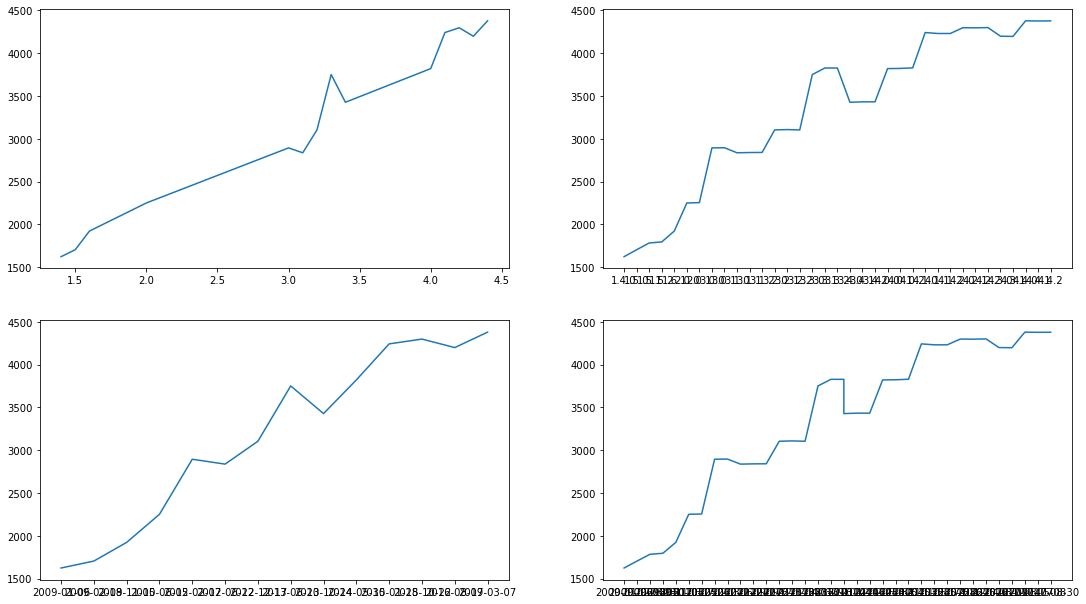

In [64]:
#import csv
major_minor = pd.read_csv('LIG_major_minor.csv',)
major_minor_patch = pd.read_csv('LIG_major_minor_patch.csv')

#draw plot for tags of the form major.minor

fig,axes = plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5)
axes[0,0].plot(major_minor['major.minor'],major_minor['nb_nfiles'])
# axes[0,0].set_title('Number of files _ MM')

axes[0,1].plot(major_minor_patch['major.minor.patch'],major_minor_patch['nb_nfiles'])
# axes[0,1].set_title('Number of files _ MMP')

axes[1,0].plot(major_minor['date'],major_minor['nb_nfiles'])
# axes[1,0].set_title('Number of files')

axes[1,1].plot(major_minor_patch['date'],major_minor_patch['nb_nfiles'])
# axes[1,1].set_title('Number of files')




### Questions:
1. Do you find any difference between the plot that is having date in the x-axis and the plot that is having tag in the x-axis? If yes, then what is the difference? If no, then why is it same?

They have the same general shape but are not exactly the same.

Plots about Major-Minor are a little but more different from one version to another than the plots for Major-Minor-Patch.

For the MMP versions, I can see a difference around the middle of the plot, one the peak. It's larger for the plot with tags

2. Which type of plot is preferable for software evolution analysis?   
    a) date in x-axis  
    b) tag in x-axis  
Why?

I think it depends on the project. For this one, I think the tag in x-axis is better because it should be easier to see the evolution of the project. We can see changes from a version to another. But, some changes could take more time so, using date is not always a good idea.

3. Choose an option regarding the growth of the software by considering Dataset A. Motivate your choice using a 1d regression plot (below).  
    a) Linear  
    b) Sub-linear  
    c) Super-linear  

It looks like it's growing sublinearly.

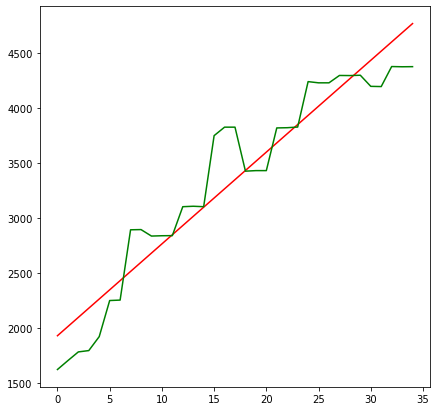

In [81]:
plt.figure(figsize=(7,7))
# Your code for regression plot

# # plot a linear regression model for major.minor.patch numbers of files
x = major_minor_patch['major.minor.patch'].astype('category').cat.codes.values.reshape(-1,1)
y = major_minor_patch['nb_nfiles'].values.reshape(-1,1)

lr = LinearRegression()
lr.fit(x,y)

#plot linear regression model
plt.plot(x,lr.predict(x),color='red')
plt.plot(x,y, color='green')





### Correlation 
Correlation is generally used to analyse the relationship between variables. Here, analyse the relationship between the number of lines of code and the number of files using Spearman correlation and Pearson correlation by considering Dataset A. Report the correlation upto 3 decimal places

In [88]:
major_minor_patch

,Unnamed: 0,major,minor,patch,nb_code,nb_blank,nb_comment,nb_nfiles,date,relative_day,major.minor.patch
0,0,1,4,0,115336,18033,37569,1624,2009-01-06,0,1.4.0
1,1,1,5,0,129319,20261,44820,1705,2009-02-18,43,1.5.0
2,2,1,5,1,133424,20780,44377,1784,2009-08-05,211,1.5.1
3,3,1,5,2,134275,20719,38184,1796,2009-08-17,223,1.5.2
4,4,1,6,1,152705,23755,65761,1923,2009-11-05,303,1.6.1
5,5,2,0,0,181316,27549,67567,2251,2010-06-05,515,2.0.0
6,6,2,0,1,181826,27681,67584,2255,2010-07-06,546,2.0.1
7,7,3,0,0,255305,39181,87179,2894,2012-02-07,1127,3.0.0
8,8,3,0,1,256081,39290,87887,2896,2012-03-12,1161,3.0.1
9,9,3,1,0,258194,39307,88912,2837,2012-06-22,1263,3.1.0


In [99]:
# Your code for correlation
# Using Spearman correlation coefficient to measure the strength of the relationship between number of lines of code and number of files
from scipy.stats import spearmanr, pearsonr
pearson_corr, _ = pearsonr(major_minor_patch['nb_code'], major_minor_patch['nb_nfiles'])
spearman_corr, _ = spearmanr(major_minor_patch['nb_code'], major_minor_patch['nb_nfiles'])

pearson_corr = round(pearson_corr, 3)
spearman_corr = round(spearman_corr, 3)



In [100]:
pearson_corr

0.993

In [101]:
spearman_corr

0.977

### Questions:
4. Do you find any difference in correlation values between Pearson and Spearman? Which one is preferable for this use case? why?

Pearson coefficient is higher than spearman coefficient. I think it's because the data is not linear. So, we should use spearman coefficient. Pearson is used for linear data

5. Based on the above correlation value, how much is the number of lines of code related to the number of files?

The number of lines of code related to the number of files, based on spearman coefficient, is 0.977%

### Prediction
Consider Dataset A for this task. Drop the last two data points in "number of lines of code" (LOC) (i.e. drop (LOC) corresponding to v4.4.1 and v4.4.2) and forecast the values for (LOC) for v4.4.1 and v4.4.2 using a basic linear/polynimial regression model.
1. Drop the last two data points
2. Build a basic regression model
3. Ask the model to forecast the next two data points
4. Plot the LOC original and forecasted in the same plot. x-axis = date, y-axis = number of lines of code

In [121]:
major_minor_patch

,Unnamed: 0,major,minor,patch,nb_code,nb_blank,nb_comment,nb_nfiles,date,relative_day,major.minor.patch
0,0,1,4,0,115336,18033,37569,1624,2009-01-06,0,1.4.0
1,1,1,5,0,129319,20261,44820,1705,2009-02-18,43,1.5.0
2,2,1,5,1,133424,20780,44377,1784,2009-08-05,211,1.5.1
3,3,1,5,2,134275,20719,38184,1796,2009-08-17,223,1.5.2
4,4,1,6,1,152705,23755,65761,1923,2009-11-05,303,1.6.1
5,5,2,0,0,181316,27549,67567,2251,2010-06-05,515,2.0.0
6,6,2,0,1,181826,27681,67584,2255,2010-07-06,546,2.0.1
7,7,3,0,0,255305,39181,87179,2894,2012-02-07,1127,3.0.0
8,8,3,0,1,256081,39290,87887,2896,2012-03-12,1161,3.0.1
9,9,3,1,0,258194,39307,88912,2837,2012-06-22,1263,3.1.0


In [103]:
major_minor_patch_copy = major_minor_patch.copy()


In [107]:
dropped_rows = major_minor_patch_copy.drop(major_minor_patch_copy.tail(2).index,inplace=True)

In [111]:
dropped_rows = major_minor_patch.tail(2)

In [112]:
dropped_rows

,Unnamed: 0,major,minor,patch,nb_code,nb_blank,nb_comment,nb_nfiles,date,relative_day,major.minor.patch
33,33,4,4,1,532915,82355,229985,4376,2017-05-08,3044,4.4.1
34,34,4,4,2,533292,82399,230058,4377,2017-08-30,3158,4.4.2


In [137]:
# Your code here
lr_lines = LinearRegression()
x = major_minor_patch['relative_day'].values.reshape(-1,1)
y = major_minor_patch['nb_code'].values.reshape(-1,1)
# lr_lines.fit(major_minor_patch['date'].astype('category').cat.codes.values.reshape(-1,1),major_minor_patch['nb_code'].values.reshape(-1,1))
lr_lines.fit(x,y)

# reg_2D = np.poly1d(np.polyfit(x, y, 2)) 
x.shape

(35, 1)

In [156]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(x)
  
poly.fit(X_poly, y)
lin3 = LinearRegression()
lin3.fit(X_poly, y)

LinearRegression()

In [157]:
predicted_nb_lines_lr = lr_lines.predict(dropped_rows['relative_day'].values.reshape(-1,1))
predicted_nb_lines_reg_3D = lin3.predict(poly.fit_transform(dropped_rows['relative_day'].values.reshape(-1,1)))
# Your code here

In [158]:
predicted_nb_lines_lr


array([[559611.33805246],
       [576561.35283319]])

In [159]:
predicted_nb_lines_reg_3D

array([[530322.04541578],
       [528771.02589524]])

In [160]:
# Your code here

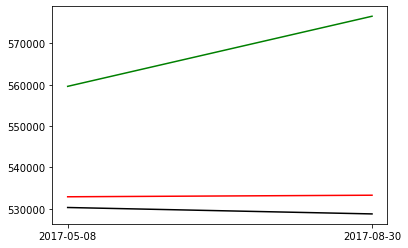

In [161]:
# Your plotting code here
# plot predicted_nb_lines vs dropped_rows['nb_code'] on date
plt.plot(dropped_rows['date'],dropped_rows['nb_code'],color='red')
plt.plot(dropped_rows['date'],predicted_nb_lines_lr,color='green')
plt.plot(dropped_rows['date'],predicted_nb_lines_reg_3D,color='black')



### Questions:
6. What is the polynomial degree that you adopted to build the model? Why? 

Degree 3 because it's the best fit for the data. I have tested from one to three.

7. What is the coefficient of determination? (R-squared)

In [162]:
#Compute R-squared for the degree 3 regression
from sklearn.metrics import r2_score
r2_score(dropped_rows['nb_code'],predicted_nb_lines_reg_3D)



-381.22488488348404

It is - 381.22

8. What is the Root mean square error for the forecasted values?

In [166]:
# Compute RMSE for the forecasted values
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(dropped_rows['nb_code'], predicted_nb_lines_reg_3D))
rmse

3685.2829153134467

The RMSE is 3685.28

### Filtering on coding langugage

In [224]:
# Your code to get the LOC for each prominent language of each version
#Your code here
tag = major_minor_patch_versions[0]
command = f'git -C {eucalyptus_project_path} reset --hard {tag}'   
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)

command = f'cloc --git --json {eucalyptus_project_path}'
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
process

data_first_version =process.stdout.read().decode("utf-8")
data_first_version = json.loads(data_first_version)

tag = major_minor_patch_versions[-1]
command = f'git -C {eucalyptus_project_path} reset --hard {tag}'   
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)

command = f'cloc --git --json {eucalyptus_project_path}'
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
process

data_last_version =process.stdout.read().decode("utf-8")
data_last_version = json.loads(data_last_version)


In [227]:
# Your plotting code here
plt.figure(figsize=(7,7))
data_first_version_copy = data_first_version.copy()
data_first_version_copy.pop('header')
data_first_version_copy.pop('SUM')


data_last_version_copy = data_last_version.copy()
data_last_version_copy.pop('header')
data_last_version_copy.pop('SUM')


{'blank': 52107, 'comment': 137468, 'code': 346189, 'nFiles': 2340}

<Figure size 504x504 with 0 Axes>

In [230]:
keys_first = data_first_version_copy.keys()
for key in keys_first:
    data_first_version_copy[key] = data_first_version_copy[key]['code']

In [231]:
keys_last = data_last_version_copy.keys()
for key in keys_last:
    data_last_version_copy[key] = data_last_version_copy[key]['code']

Text(0.5, 1.0, 'Last version')

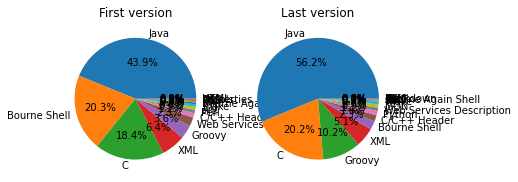

In [232]:
# plot pie chart for first version
plt.subplot(1,2,1)
plt.pie(data_first_version_copy.values(),labels=data_first_version_copy.keys(),autopct='%1.1f%%')
plt.title('First version')

# plot pie chart for last version
plt.subplot(1,2,2)  
plt.pie(data_last_version_copy.values(),labels=data_last_version_copy.keys(),autopct='%1.1f%%')
plt.title('Last version')



In [237]:
data_last_version_copy.keys()

dict_keys(['Java', 'C', 'Groovy', 'XML', 'Bourne Shell', 'C/C++ Header', 'Python', 'Web Services Description', 'JSON', 'Perl', 'make', 'm4', 'Ant', 'XSLT', 'Bourne Again Shell', 'diff', 'Markdown', 'Text', 'INI', 'YAML'])

In [238]:
data_first_version_copy.keys()

dict_keys(['Java', 'Bourne Shell', 'C', 'XML', 'Groovy', 'Web Services Description', 'C/C++ Header', 'Perl', 'Ant', 'make', 'Bourne Again Shell', 'm4', 'CSS', 'XSD', 'Properties', 'Drools', 'HTML', 'diff'])

### Please, consider these few lines of code above during cotation of the assignment. I know the beginning is not complete but it should prouve I now can work with CLOC

### Question:
9. Do you find any significant difference in the distribution of the language used in the software project between its first and the last version? If so, what is the difference and how much is it?

The main difference is on Java, more 12% on last version. We have also added Python. C is a little bit less used.

### Law of increasing growth for coding langugages

Consider the prominent langugages used in this software project and plot the distribution of their LOC in a pie chart for the first and the last versions

Java, C, Groovy, Pearl for first version

Add Python to them for last version

Get the LOC for each of the considered prominent langugages (as above) for each version of the form major.minor.patch  
1) Plot the date (x-axis) vs LOC (y-axis) 
2) Plot the date (x-axis) vs proportional LOC (y-axis). Proportional is LOC of a language/total number of LOC

In [261]:
data = list()
for tag in major_minor_patch:
    command = f'git -C {eucalyptus_project_path} reset --hard {tag}'   
    process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)

    command = f'cloc --git --json {eucalyptus_project_path}'
    process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)

    data.append(json.loads(process.stdout.read().decode("utf-8")))


In [262]:
data_copy = data.copy()

In [259]:
data = data_copy.copy()

In [263]:
data

[{'header': {'cloc_url': 'github.com/AlDanial/cloc',
   'cloc_version': '1.96',
   'elapsed_seconds': 8.6259880065918,
   'n_files': 3598,
   'n_lines': 766399,
   'files_per_second': 417.111639530508,
   'lines_per_second': 88847.6774387275},
  'Java': {'nFiles': 2636, 'blank': 48101, 'comment': 150484, 'code': 293669},
  'C': {'nFiles': 82, 'blank': 11835, 'comment': 32028, 'code': 69828},
  'Groovy': {'nFiles': 312, 'blank': 7037, 'comment': 9919, 'code': 50874},
  'XML': {'nFiles': 235, 'blank': 1822, 'comment': 4593, 'code': 21126},
  'Bourne Shell': {'nFiles': 44,
   'blank': 1495,
   'comment': 3646,
   'code': 12181},
  'C/C++ Header': {'nFiles': 67, 'blank': 1938, 'comment': 8206, 'code': 5706},
  'Perl': {'nFiles': 42, 'blank': 747, 'comment': 2842, 'code': 4292},
  'Python': {'nFiles': 56, 'blank': 695, 'comment': 1768, 'code': 3965},
  'JSON': {'nFiles': 16, 'blank': 0, 'comment': 0, 'code': 3339},
  'Web Services Description': {'nFiles': 4,
   'blank': 525,
   'comment': 2

In [264]:
useful_data = list()
for version in data:
    version_data = {}
    version_data['date'] = version['header']['date']
    version_data[''] = version['header']['git']['describe']
    # version.pop('header')
    # version.pop('SUM')
    # keys_first = version.keys()
    # for key in keys_first:
    #     if(key in ['Java', 'C', 'Python', 'Groovy', 'Perl']):
    #         version[key] = version[key]['code']
    #     else:
            


SyntaxError: unexpected EOF while parsing (<ipython-input-264-abaa5fb7e8a7>, line 11)

In [260]:
data

[{'Java': 293669,
  'C': 69828,
  'Groovy': 50874,
  'Bourne Shell': {'nFiles': 44,
   'blank': 1495,
   'comment': 3646,
   'code': 12181},
  'C/C++ Header': {'nFiles': 67, 'blank': 1938, 'comment': 8206, 'code': 5706},
  'Perl': {'nFiles': 42, 'blank': 747, 'comment': 2842, 'code': 4292},
  'Python': {'nFiles': 56, 'blank': 695, 'comment': 1768, 'code': 3965},
  'JSON': {'nFiles': 16, 'blank': 0, 'comment': 0, 'code': 3339},
  'Web Services Description': {'nFiles': 4,
   'blank': 525,
   'comment': 298,
   'code': 3110},
  'Text': {'nFiles': 12, 'blank': 52, 'comment': 0, 'code': 1857},
  'make': {'nFiles': 17, 'blank': 308, 'comment': 952, 'code': 986},
  'CSS': {'nFiles': 1, 'blank': 196, 'comment': 49, 'code': 941},
  'm4': {'nFiles': 3, 'blank': 85, 'comment': 1, 'code': 733},
  'Ant': {'nFiles': 44, 'blank': 396, 'comment': 1471, 'code': 594},
  'XSLT': {'nFiles': 1, 'blank': 27, 'comment': 106, 'code': 326},
  'Bourne Again Shell': {'nFiles': 5,
   'blank': 76,
   'comment': 16

### Question:
10. Does the prominent languages considered by you obey laws of increasing growth?

11. Does this software project obey the Law of Increasing Growth?

### Modify the CLOC parameters

1. Exclude all bank lines and verify if the Law of Increasing Growth still holds good for this filtering

In [ ]:
# Your code and plot here

2. Exclude all comment lines and verify if the Law of Increasing Growth still holds good for this filtering

In [ ]:
# Your code and plot here

3. Exclude all non-code files (or consider prominent coding langugages used in the project) and and verify if the Law of Increasing Growth still holds good for this filtering

In [ ]:
# Your code and plot here

### 2.3 Law of Continuing Change
1. Using CLOC tool, find the features such as number of lines of code that are added, modified, removed and same between two consecutive versions
2. Consider all the three component versions (major.minor.patch) - Dataset A
3. Consider only the minor versions (major.minor) - Dataset B
4. Having all the features in the same plot, create two plots (one for Dataset A and another for Dataset B) the outcomes with date on x-axis and the number on y-axis.
5. Make a subplot of all the features

Code hint:  
For each pair of tags, set the original project to the required tag and the copy of the original project to the next tag.  
To get the required data in json format - "command = f'CLOC/cloc --git --diff {first_project_path} {second_project_path} --json'"

In [ ]:
eucalyptus_project_path = '' # your project path here
eucalyptus_copy_project_path = '' # your path to the copy of your project here
major_minor_patch_versions = '' #set of version that you would like to consider for this analysis

In [ ]:
# Your code here to get the data

In [ ]:
# Your code here to get the dates corresponding to the tags

In [ ]:
# Your plotting code here (all the features in a single plot)

In [ ]:
# Your plotting code here, different plot for each feature
fig,axes = plt.subplots(2,2)

### Questions:
1. Do you find the Law of Continuing Change holding good here? Prove it empirically.

2. Does the law of increasing growth too hold good here?

### Law of continuing change for coding languages
Consider the prominent languages used in this software project for versions of the form major.minor.patch
1. Obtain the number of lines of code that are added, modified, removed and same between two consecutive versions
2. Make plots for each parameter (added, modified, removed and same) with date on x-axis  
    a) y-axis number of lines of code   
    b) y-axis proportional number of lines of code (number of lines of code of that language/total number of lines of code) 

In [ ]:
# Your code here

In [ ]:
# Your plotting code here
fig,axes = plt.subplots(2,2)

### Question:
3. Does the law of continuing change obey here for all the considered prominent langugages? Comment on the rate of growth.  

4. Does this software project obey Law of Continuing Change?